<a href="https://colab.research.google.com/github/praneykalra16/Parameter_Optimisation/blob/main/Parameter_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
electrical_grid_stability_simulated_data = fetch_ucirepo(id=471)

# data (as pandas dataframes)
X = electrical_grid_stability_simulated_data.data.features
y = electrical_grid_stability_simulated_data.data.targets

# metadata
print(electrical_grid_stability_simulated_data.metadata)

# variable information
print(electrical_grid_stability_simulated_data.variables)


{'uci_id': 471, 'name': 'Electrical Grid Stability Simulated Data ', 'repository_url': 'https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data', 'data_url': 'https://archive.ics.uci.edu/static/public/471/data.csv', 'abstract': 'The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept. ', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['stab', 'stabf'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Tue Jan 09 2024', 'dataset_doi': '10.24432/C5PG66', 'creators': ['Vadim Arzamasov'], 'intro_paper': None, 'additional_info': {'summary': "The analysis is performed for different sets of input values using the methodology similar to

In [4]:
import pandas as pd

data_path = 'https://archive.ics.uci.edu/static/public/471/data.csv'
dataset = pd.read_csv(data_path)

dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


###Importing Necessary Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [33]:
X = dataset.iloc[:,0:-1]
y = dataset['stabf']

In [34]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.83537431, -0.79131661,  1.14170354, ...,  1.32162751,
         1.57902607,  1.07312049],
       [ 1.47829663, -0.12670487, -0.80311147, ...,  0.13542358,
         0.93625569, -0.58748693],
       [ 1.35709296,  1.31213982, -0.80349871, ...,  1.14659574,
        -1.51380226, -0.33209522],
       ...,
       [-1.05234609, -0.87804866,  1.28587062, ..., -1.37001303,
        -1.38205402, -1.28776846],
       [ 1.59768553, -0.45784646, -0.90902909, ...,  1.32772953,
         1.06982944,  0.59749703],
       [ 0.4669346 ,  0.55855544, -0.32829064, ..., -0.53325125,
         1.52285961,  0.79996368]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [35]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [36]:
samples

[(          tau1      tau2      tau3      tau4        p1        p2        p3  \
  7681  2.624319  1.659150  4.207535  2.130061  3.242956 -0.700593 -1.406236   
  9031  6.893163  5.263322  6.522294  5.946892  3.620935 -0.763281 -0.993764   
  3691  8.100407  3.378664  5.575856  6.347619  3.778036 -0.928075 -0.861252   
  202   7.929380  2.726863  2.479474  7.039468  2.903386 -1.684745 -0.632887   
  5625  6.975697  4.247619  3.895126  3.307572  4.619322 -1.728679 -0.945841   
  ...        ...       ...       ...       ...       ...       ...       ...   
  9225  9.246900  0.762513  6.090067  2.565825  4.405437 -1.501414 -1.383120   
  4859  5.509365  0.877761  2.615887  1.798310  2.775639 -1.088767 -0.889592   
  3264  2.035421  6.420652  7.517043  4.394761  4.256425 -1.556208 -0.753091   
  9845  0.858408  5.702967  1.565204  6.115755  3.445374 -0.552281 -1.534501   
  2732  8.283623  1.785638  6.894354  4.723247  3.878700 -0.913489 -1.285638   
  
              p4        g1        g2 

### Creation of a Fitness Function

In [37]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [38]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [39]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

for i in range(len(samples)):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    for kernel in kernels:
        X_train, X_test, y_train, y_test = samples[i]

        # Ensure y_train is suitable for classification
        if y_train.dtype.kind in 'fc':  # Check if data type is float or complex
            y_train = LabelEncoder().fit_transform(y_train)  # Encode labels as integers
            y_test = LabelEncoder().fit_transform(y_test)

        C = np.random.uniform(0, 10)
        gamma = np.random.uniform(0, 10)
        score = fitnessFunction(kernel, C, gamma)
        if score > best_accuracy:
            best_accuracy = round(score, 2)
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel
    print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]


Best Accuracy =  0.67 Best Kernel =  linear Best Nu =  2.42 Best Epsilon =  1.44
Best Accuracy =  0.64 Best Kernel =  rbf Best Nu =  6.4 Best Epsilon =  5.53
Best Accuracy =  0.67 Best Kernel =  linear Best Nu =  1.4 Best Epsilon =  1.72
Best Accuracy =  0.64 Best Kernel =  rbf Best Nu =  8.52 Best Epsilon =  6.57
Best Accuracy =  0.66 Best Kernel =  rbf Best Nu =  2.64 Best Epsilon =  2.84
Best Accuracy =  0.64 Best Kernel =  poly Best Nu =  6.59 Best Epsilon =  9.58
Best Accuracy =  0.65 Best Kernel =  rbf Best Nu =  1.94 Best Epsilon =  4.32
Best Accuracy =  0.67 Best Kernel =  linear Best Nu =  8.26 Best Epsilon =  3.39
Best Accuracy =  0.65 Best Kernel =  poly Best Nu =  2.79 Best Epsilon =  8.69
Best Accuracy =  0.72 Best Kernel =  poly Best Nu =  6.22 Best Epsilon =  6.31


### Calling the Function for Every Sample

In [40]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.7 Best Kernel =  poly Best Nu =  1.34 Best Epsilon =  6.57
Best Accuracy =  0.64 Best Kernel =  rbf Best Nu =  3.45 Best Epsilon =  7.48
Best Accuracy =  0.65 Best Kernel =  poly Best Nu =  5.37 Best Epsilon =  4.68
Best Accuracy =  0.65 Best Kernel =  rbf Best Nu =  8.18 Best Epsilon =  4.1
Best Accuracy =  0.65 Best Kernel =  rbf Best Nu =  7.49 Best Epsilon =  6.36
Best Accuracy =  0.64 Best Kernel =  poly Best Nu =  9.16 Best Epsilon =  8.45
Best Accuracy =  0.66 Best Kernel =  rbf Best Nu =  1.03 Best Epsilon =  2.16
Best Accuracy =  0.67 Best Kernel =  rbf Best Nu =  6.79 Best Epsilon =  1.15
Best Accuracy =  0.68 Best Kernel =  linear Best Nu =  0.75 Best Epsilon =  0.25
Best Accuracy =  0.72 Best Kernel =  poly Best Nu =  9.25 Best Epsilon =  5.91


###Creation of a Result Table

In [41]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.70,poly,1.34,6.57
1,2,0.64,rbf,3.45,7.48
2,3,0.65,poly,5.37,4.68
3,4,0.65,rbf,8.18,4.10
4,5,0.65,rbf,7.49,6.36
5,6,0.64,poly,9.16,8.45
6,7,0.66,rbf,1.03,2.16
7,8,0.67,rbf,6.79,1.15
8,9,0.68,linear,0.75,0.25
9,10,0.72,poly,9.25,5.91


### Plotting of the Convergence Graph/Linear Curve

In [42]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [43]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [44]:
train_sizes

array([  63,  190,  317,  444,  572,  699,  826,  954, 1081, 1208, 1335,
       1463, 1590, 1717, 1845, 1972, 2099, 2226, 2354, 2481, 2608, 2736,
       2863, 2990, 3117, 3245, 3372, 3499, 3627, 3754, 3881, 4008, 4136,
       4263, 4390, 4518, 4645, 4772, 4899, 5027, 5154, 5281, 5409, 5536,
       5663, 5790, 5918, 6045, 6172, 6300])

In [45]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

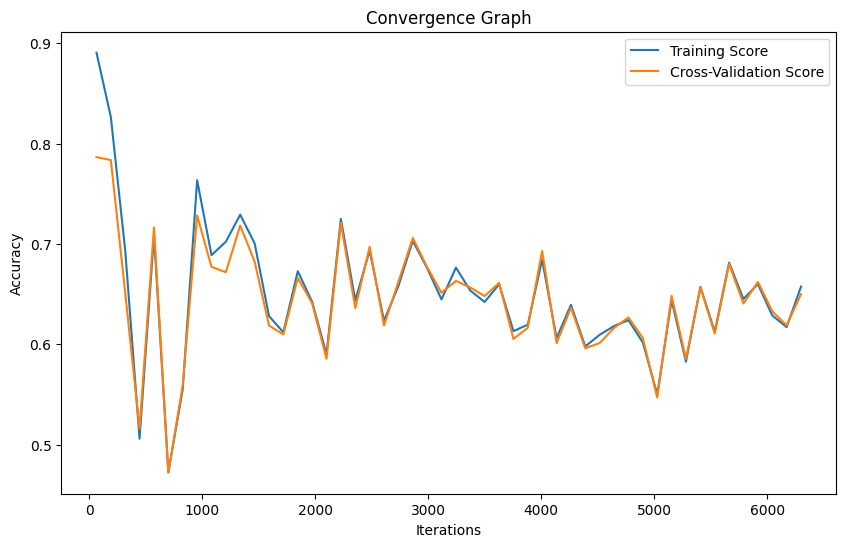

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()